In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amex-data/test_data.parquet
/kaggle/input/amex-data/add_event.parquet
/kaggle/input/amex-data/data_dictionary.csv
/kaggle/input/amex-data/offer_metadata.parquet
/kaggle/input/amex-data/add_trans.parquet
/kaggle/input/amex-data/train_data.parquet


In [3]:
import pandas as pd

# Sample load for exploration
train = pd.read_parquet("/kaggle/input/amex-data/train_data.parquet")

# Optional sampling to prevent OOM
train_sample = train.sample(n=100_000, random_state=42)

print(train_sample.shape)
train_sample.head()


(100000, 372)


id1      id2     id3  \
629135   1635953_94904_16-23_2023-11-01 13:06:22.201  1635953   94904   
236203   1481844_97067_16-23_2023-11-02 15:17:53.525  1481844   97067   
481087   1000835_96713_16-23_2023-11-01 07:36:20.869  1000835   96713   
505123   1082655_92870_16-23_2023-11-03 10:38:30.802  1082655   92870   
510279  1399564_875283_16-23_2023-11-03 19:26:12.372  1399564  875283   

                            id4         id5  y    f1    f2    f3    f4  ...  \
629135  2023-11-01 13:06:22.201  2023-11-01  0  None  None  None  None  ...   
236203  2023-11-02 15:17:53.525  2023-11-02  0  25.0  None   1.0  None  ...   
481087  2023-11-01 07:36:20.869  2023-11-01  0  25.0  None  None  None  ...   
505123  2023-11-03 10:38:30.802  2023-11-03  0  41.0   4.0  28.0  None  ...   
510279  2023-11-03 19:26:12.372  2023-11-03  0  None   4.0  None  None  ...   

                       f357                f358 f359  f360  f361 f362  \
629135  -0.0044655868985921  0.0837403238016165  0.0  None  53.0  1.0   
236203   0.0015310917925931   0.051351973011654  0.0  None  13.0  0.0   
481087   0.0026791446322801  0.0421079401354477  0.0  None   6.0  0.0   
505123                 None             -9999.0  0.0  None  20.0  0.0   
510279   0.0036474649287196  0.0686681163446401  0.0  None  31.0  0.0   

                      f363   f364  f365                f366  
629135  0.0188679245283018   None  None                None  
236203                 0.0   95.0   0.0                 0.0  
481087                 0.0  106.0   2.0  0.0188679245283018  
505123                 0.0  124.0   0.0                 0.0  
510279                 0.0  142.0   1.0  0.0070422535211267  

[5 rows x 372 columns]

In [4]:
import pandas as pd

PATH = '/kaggle/input/amex-data'  # change if different

train = pd.read_parquet(f'{PATH}/train_data.parquet')
test = pd.read_parquet(f'{PATH}/test_data.parquet')
events = pd.read_parquet(f'{PATH}/add_event.parquet')
trans = pd.read_parquet(f'{PATH}/add_trans.parquet')
offers = pd.read_parquet(f'{PATH}/offer_metadata.parquet')

print("Train:", train.shape)
print("Test:", test.shape)
print("Events:", events.shape)
print("Trans:", trans.shape)
print("Offers:", offers.shape)


Train: (770164, 372)
Test: (369301, 371)
Events: (21457473, 5)
Trans: (6339465, 9)
Offers: (4164, 12)


In [5]:
print("Train impression IDs unique?", train['id1'].is_unique)
print("Offer IDs in offers:", offers['id3'].nunique())
print("Train offer IDs:", train['id3'].nunique())
print("All train offers found in metadata?", train['id3'].isin(offers['id3']).all())


Train impression IDs unique? True
Offer IDs in offers: 4164
Train offer IDs: 757
All train offers found in metadata? False


In [6]:
print(train.columns.tolist())



['id1', 'id2', 'id3', 'id4', 'id5', 'y', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f1

In [7]:
train_nulls = train.isnull().sum()
print(train_nulls[train_nulls > 0])

print("\nSample types:")
print(train.dtypes.head(10))


f1      491658
f2      447192
f3      661602
f4      701295
f5      231810
         ...  
f362    115752
f363    115752
f364    108314
f365    108314
f366    108314
Length: 364, dtype: int64

Sample types:
id1    object
id2    object
id3    object
id4    object
id5    object
y      object
f1     object
f2     object
f3     object
f4     object
dtype: object


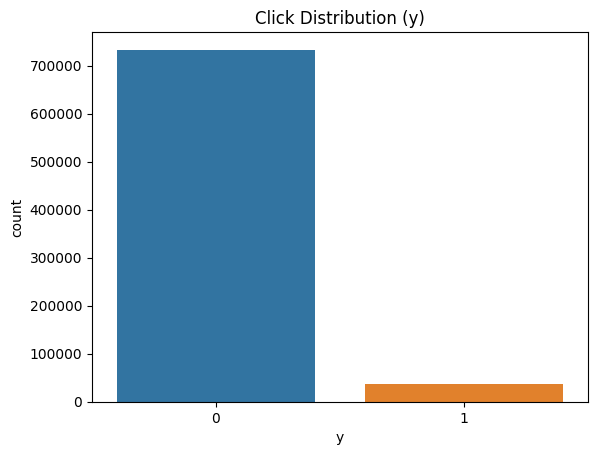

Click value distribution (y):
y
0    0.951892
1    0.048108
Name: proportion, dtype: float64


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(data=train, x='y')
plt.title('Click Distribution (y)')
plt.show()

print("Click value distribution (y):")
print(train['y'].value_counts(normalize=True))


In [9]:
# Apply conversion to all f1–f366 columns in a vectorized way
cols_to_convert = train.columns[6:]  # skip ID and y

train[cols_to_convert] = train[cols_to_convert].apply(pd.to_numeric, errors='coerce')
test[cols_to_convert] = test[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Fix 'y' in train too
train['y'] = pd.to_numeric(train['y'], errors='coerce')

print(" Dtype conversion done (vectorized).")
train.dtypes.head(10)



 Dtype conversion done (vectorized).


id1     object
id2     object
id3     object
id4     object
id5     object
y        int64
f1     float64
f2     float64
f3     float64
f4     float64
dtype: object

In [10]:
user_ctr = train.groupby("id2")["y"].agg(["count", "sum"])
user_ctr["user_global_ctr"] = user_ctr["sum"] / user_ctr["count"]
user_ctr = user_ctr[["user_global_ctr"]].reset_index()

# Merge into train and test
train = train.merge(user_ctr, on="id2", how="left")
test = test.merge(user_ctr, on="id2", how="left")

# Fill missing with 0 for unseen users in test
test["user_global_ctr"] = test["user_global_ctr"].fillna(0)

print(" user_global_ctr added")


 user_global_ctr added


In [11]:
offer_ctr = train.groupby("id3")["y"].agg(["count", "sum"])
offer_ctr["offer_global_ctr"] = offer_ctr["sum"] / offer_ctr["count"]
offer_ctr = offer_ctr[["offer_global_ctr"]].reset_index()

# Merge into train and test
train = train.merge(offer_ctr, on="id3", how="left")
test = test.merge(offer_ctr, on="id3", how="left")

# Fill missing for unseen offers in test
test["offer_global_ctr"] = test["offer_global_ctr"].fillna(0)

print(" offer_global_ctr added")


 offer_global_ctr added


In [12]:
# Ensure date columns are datetime

offers["id12"] = pd.to_datetime(offers["id12"])  # start date
offers["id13"] = pd.to_datetime(offers["id13"])  # end date
offers["time_to_expiry"] = (offers["id13"] - offers["id12"]).dt.days

# Convert id3 to int in train and test
train['id3'] = train['id3'].astype(int)
test['id3'] = test['id3'].astype(int)

# Now merge should work fine
train = train.merge(offers[['id3', 'time_to_expiry']], on='id3', how='left')
test = test.merge(offers[['id3', 'time_to_expiry']], on='id3', how='left')

print(" time_to_expiry added successfully")


 time_to_expiry added successfully


In [13]:
# Filter impressions only from events (id6 = 0 → impression)
past_impressions = events[events['id6'] == 0]

# Count user-offer impressions
user_offer_imp = past_impressions.groupby(['id2', 'id3']).size().reset_index(name='user_offer_imp_count')

# Ensure matching dtypes
train['id3'] = train['id3'].astype(int)
test['id3'] = test['id3'].astype(int)
user_offer_imp['id3'] = user_offer_imp['id3'].astype(int)

# Merge into train and test
train = train.merge(user_offer_imp, on=['id2', 'id3'], how='left')
test = test.merge(user_offer_imp, on=['id2', 'id3'], how='left')

# Fill missing (i.e., never seen before) with 0
train['user_offer_imp_count'] = train['user_offer_imp_count'].fillna(0)
test['user_offer_imp_count'] = test['user_offer_imp_count'].fillna(0)

print(" user_offer_imp_count added")


 user_offer_imp_count added


In [14]:
print(trans.columns.tolist())
print("Unique industries in trans (id8):", trans['id8'].nunique())
print("Overlap in industry codes (id8) between offers and trans:")
print(len(set(offers['id8']).intersection(set(trans['id8']))))
trans.groupby('id2')['id8'].nunique().describe()



['id2', 'f367', 'f368', 'f369', 'f370', 'f371', 'f372', 'id8', 'f374']
Unique industries in trans (id8): 5597
Overlap in industry codes (id8) between offers and trans:
291


count    194115.000000
mean         14.636659
std          13.004407
min           0.000000
25%           4.000000
50%          11.000000
75%          22.000000
max         118.000000
Name: id8, dtype: float64

In [15]:
# Ensure correct dtypes
trans['id2'] = trans['id2'].astype(str)
trans['id8'] = trans['id8'].astype(str)

# Create the grouped transaction feature
user_industry_txn = trans.groupby(['id2', 'id8']).size().reset_index(name='txn_count')
#  Safely drop id8 if it already exists (in case you're rerunning)
for df in [train, test]:
    if 'id8' in df.columns:
        df.drop('id8', axis=1, inplace=True)

#  Ensure id2 and id8 are all strings for safe merging
for df in [train, test, user_industry_txn]:
    df['id2'] = df['id2'].astype(str)

user_industry_txn['id8'] = user_industry_txn['id8'].astype(str)

#  Merge offer industry into train/test (from offers)
offers['id8'] = offers['id8'].astype(str)  # ensure consistent dtype
train = train.merge(offers[['id3', 'id8']], on='id3', how='left')
test = test.merge(offers[['id3', 'id8']], on='id3', how='left')

# Merge user-industry transaction flag
train = train.merge(user_industry_txn, on=['id2', 'id8'], how='left')
test = test.merge(user_industry_txn, on=['id2', 'id8'], how='left')

#  Create feature
train['user_industry_match'] = train['txn_count'].notna().astype(int)
test['user_industry_match'] = test['txn_count'].notna().astype(int)

#  Cleanup
train.drop(['id8', 'txn_count'], axis=1, inplace=True)
test.drop(['id8', 'txn_count'], axis=1, inplace=True)

print(" user_industry_match added successfully")


 user_industry_match added successfully


In [16]:
train['id4'] = pd.to_datetime(train['id4'])
train = train.sort_values('id4')


In [17]:
# Use 80% of oldest impressions for training, rest for validation
split_time = train['id4'].quantile(0.8)

train_part = train[train['id4'] <= split_time]
val_part = train[train['id4'] > split_time]

print("Train shape:", train_part.shape)
print("Validation shape:", val_part.shape)


Train shape: (616131, 377)
Validation shape: (154033, 377)


In [18]:
features = [
    'user_global_ctr',
    'offer_global_ctr',
    'time_to_expiry',
    'user_offer_imp_count',
    'user_industry_match'
]
target = 'y'


In [19]:
def get_group(df):
    return df.groupby('id2').size().to_list()

group_train = get_group(train_part)
group_val = get_group(val_part)


In [20]:
print(train.columns.tolist())


['id1', 'id2', 'id3', 'id4', 'id5', 'y', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25', 'f26', 'f27', 'f28', 'f29', 'f30', 'f31', 'f32', 'f33', 'f34', 'f35', 'f36', 'f37', 'f38', 'f39', 'f40', 'f41', 'f42', 'f43', 'f44', 'f45', 'f46', 'f47', 'f48', 'f49', 'f50', 'f51', 'f52', 'f53', 'f54', 'f55', 'f56', 'f57', 'f58', 'f59', 'f60', 'f61', 'f62', 'f63', 'f64', 'f65', 'f66', 'f67', 'f68', 'f69', 'f70', 'f71', 'f72', 'f73', 'f74', 'f75', 'f76', 'f77', 'f78', 'f79', 'f80', 'f81', 'f82', 'f83', 'f84', 'f85', 'f86', 'f87', 'f88', 'f89', 'f90', 'f91', 'f92', 'f93', 'f94', 'f95', 'f96', 'f97', 'f98', 'f99', 'f100', 'f101', 'f102', 'f103', 'f104', 'f105', 'f106', 'f107', 'f108', 'f109', 'f110', 'f111', 'f112', 'f113', 'f114', 'f115', 'f116', 'f117', 'f118', 'f119', 'f120', 'f121', 'f122', 'f123', 'f124', 'f125', 'f126', 'f127', 'f128', 'f129', 'f130', 'f131', 'f132', 'f133', 'f1

In [21]:
# Ensure dates are datetime
offers['id12'] = pd.to_datetime(offers['id12'])  # offer start
offers['id13'] = pd.to_datetime(offers['id13'])  # offer end

# Calculate time to expiry in days
offers['time_to_expiry'] = (offers['id13'] - offers['id12']).dt.days

for df in [train, test]:
    if 'time_to_expiry' in df.columns:
        df.drop('time_to_expiry', axis=1, inplace=True)

train = train.merge(offers[['id3', 'time_to_expiry']], on='id3', how='left')
test = test.merge(offers[['id3', 'time_to_expiry']], on='id3', how='left')

print('time_to_expiry' in train.columns)  # should be True
print(train[['time_to_expiry']].head())   # sanity check

train['id4'] = pd.to_datetime(train['id4'])
train = train.sort_values('id4')
split_time = train['id4'].quantile(0.8)
train_part = train[train['id4'] <= split_time]
val_part = train[train['id4'] > split_time]

features = [
    'user_global_ctr',
    'offer_global_ctr',
    'time_to_expiry',
    'user_offer_imp_count',
    'user_industry_match'
]

print(train_part[features].head())  # ✅ NOW this should work




True
   time_to_expiry
0            43.0
1            99.0
2            92.0
3            92.0
4            60.0
   user_global_ctr  offer_global_ctr  time_to_expiry  user_offer_imp_count  \
0              0.0          0.000000            43.0                   0.0   
1              0.0          0.000000            99.0                   0.0   
2              0.0          0.010390            92.0                   0.0   
3              0.0          0.021368            92.0                   0.0   
4              0.0          0.000000            60.0                   0.0   

   user_industry_match  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0  


In [22]:
import lightgbm as lgb

train_data = lgb.Dataset(train_part[features], label=train_part[target], group=group_train)
val_data = lgb.Dataset(val_part[features], label=val_part[target], group=group_val)

params = {
    'objective': 'lambdarank',
    'metric': 'map',
    'eval_at': [7],
    'learning_rate': 0.1,
    'num_leaves': 31,
    'verbosity': -1,
    'boosting_type': 'gbdt'
}

model = lgb.train(
    params,
    train_data,
    valid_sets=[train_data, val_data],
    valid_names=['train', 'val'],
    callbacks=[
        lgb.early_stopping(stopping_rounds=30),
        lgb.log_evaluation(period=50)
    ],
    num_boost_round=300
)



Training until validation scores don't improve for 30 rounds
[50]	train's map@7: 0.958893	val's map@7: 0.952699
[100]	train's map@7: 0.960937	val's map@7: 0.952875
Early stopping, best iteration is:
[85]	train's map@7: 0.960328	val's map@7: 0.95307


In [23]:
test['pred'] = model.predict(test[features], num_iteration=model.best_iteration)


In [24]:
# Sort predictions within each user
submission = (
    test[['id2', 'id3', 'pred']]
    .sort_values(['id2', 'pred'], ascending=[True, False])
    .groupby('id2')
    .head(7)  # top 7 offers per user
)


In [25]:
# Group by id2 and join top 7 offer IDs as space-separated string
submission = (
    submission.groupby('id2')['id3']
    .apply(lambda x: ' '.join(map(str, x)))
    .reset_index()
)

submission.columns = ['user_id', 'recommended_offers']


In [26]:
submission.to_csv('amex_submission.csv', index=False)


In [27]:
import pandas as pd
submission = pd.read_csv('amex_submission.csv')
print(submission.head())
print(submission.shape)


   user_id                                 recommended_offers
0  1000061  62395 97904824 5420674 31794 430736 80107221 9...
1  1000131                                 74649 67681 415582
2  1000133                                             379274
3  1000164       80893 331980 60448 960643 688083 25749 93527
4  1000331     70222 56461 77194 87463 90984 189706075 281783
(21118, 2)


In [28]:
# All 'f' columns + engineered features
features = [col for col in train.columns if col.startswith('f')] + [
    'user_global_ctr', 'offer_global_ctr', 'time_to_expiry',
    'user_offer_imp_count', 'user_industry_match'
]


In [29]:
features = [f for f in features if train[f].dtype != 'object']


In [30]:
import lightgbm as lgb

# Step 1: Create datasets with free_raw_data=False
train_set = lgb.Dataset(train_part[features], label=train_part[target], group=group_train, free_raw_data=False)
val_set = lgb.Dataset(val_part[features], label=val_part[target], group=group_val, free_raw_data=False)

# Step 2: Train with early stopping and evaluation logging
model = lgb.train(
    params,
    train_set,
    valid_sets=[val_set],
    num_boost_round=1000,
    callbacks=[
        lgb.early_stopping(stopping_rounds=30),
        lgb.log_evaluation(period=50)
    ]
)



Training until validation scores don't improve for 30 rounds
[50]	valid_0's map@7: 0.959634
[100]	valid_0's map@7: 0.95964
Early stopping, best iteration is:
[71]	valid_0's map@7: 0.96038


In [31]:
test['pred'] = model.predict(test[features], num_iteration=model.best_iteration)


In [32]:
submission = test[['id1', 'id2', 'id3', 'id5', 'pred']]
submission.to_csv("/kaggle/working/amex_submission_full.csv", index=False)
print("Submission saved.")


Submission saved.


In [33]:
model.save_model("lightgbm_model.txt")

import json
with open("features.json", "w") as f:
    json.dump(features, f)


In [34]:
from scipy.special import expit  # sigmoid function

# Apply sigmoid to convert raw scores into probabilities
test['pred'] = expit(test['pred'])

In [35]:
submission = test[['id1', 'id2', 'id3', 'id5', 'pred']]
submission.to_csv("/kaggle/working/amex_submission_full2.csv", index=False)
print("Submission saved.")

Submission saved.
